In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [2]:
mdata = sm.datasets.macrodata.load_pandas().data
mdata

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [3]:
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates['year'] + 'Q' + dates['quarter']


In [4]:
from statsmodels.tsa.base.datetools import dates_from_str
quarterly = dates_from_str(quarterly)
dates

,year,quarter
0,1959,1
1,1959,2
2,1959,3
3,1959,4
4,1960,1
...,...,...
198,2008,3
199,2008,4
200,2009,1
201,2009,2


<Axes: >

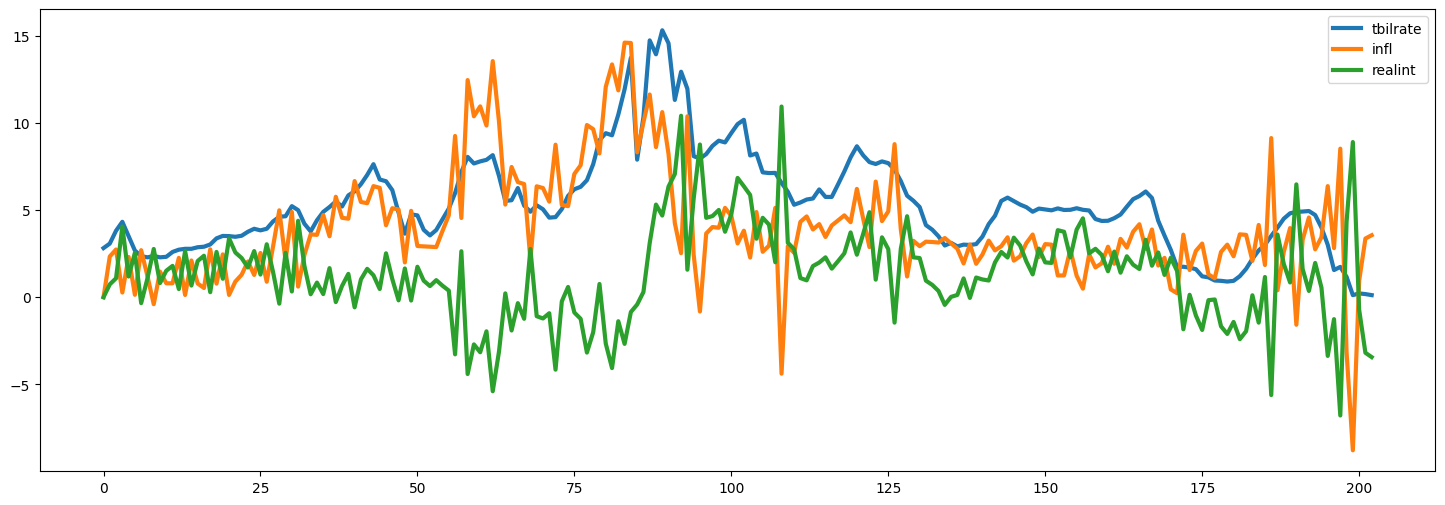

In [5]:
mdata[['tbilrate', 'infl', 'realint']].plot(figsize=(18,6), linewidth=3)

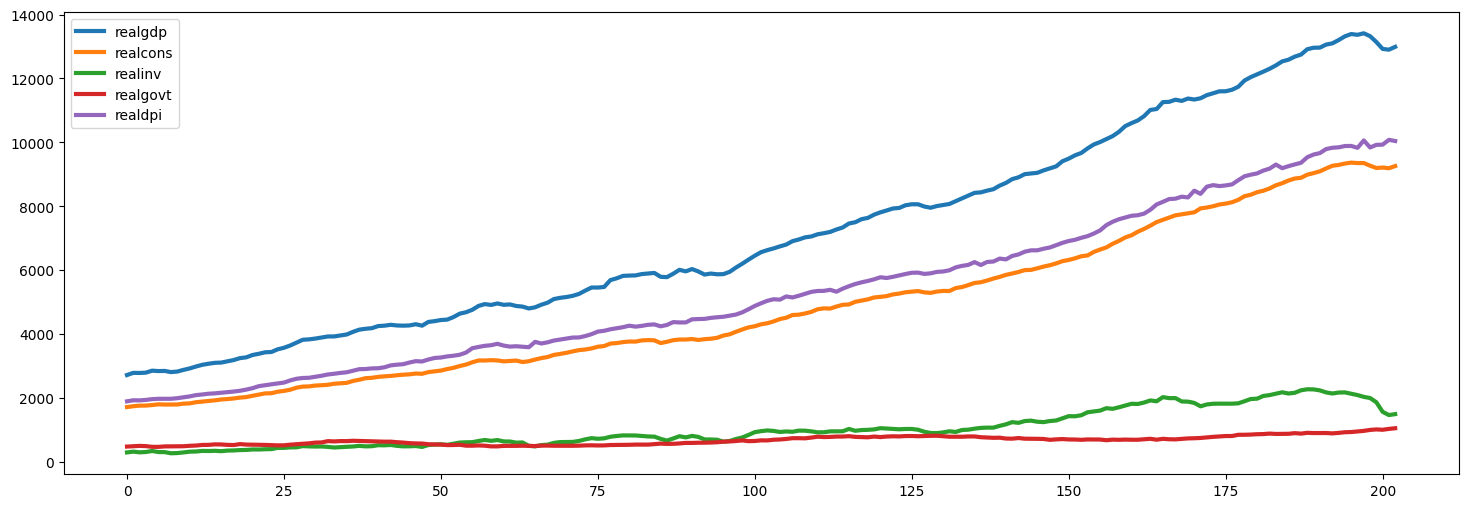

In [6]:
import matplotlib.pyplot as plt
mdata[['realgdp', 'realcons', 'realinv', 'realgovt', 'realdpi']].plot(figsize=(18,6), linewidth=3)
plt.show()

In [7]:
mdata = mdata[['realgdp', 'realcons', 'realinv']]
mdata.index = pd.DatetimeIndex(quarterly)
data = np.log(mdata).diff().dropna()
data

,realgdp,realcons,realinv
1959-06-30,0.024942,0.015286,0.080213
1959-09-30,-0.001193,0.010386,-0.072131
1959-12-31,0.003495,0.001084,0.034425
1960-03-31,0.022190,0.009534,0.102664
1960-06-30,-0.004685,0.012572,-0.106694
...,...,...,...
2008-09-30,-0.006781,-0.008948,-0.017836
2008-12-31,-0.013805,-0.007843,-0.069165
2009-03-31,-0.016612,0.001511,-0.175598
2009-06-30,-0.001851,-0.002196,-0.067561


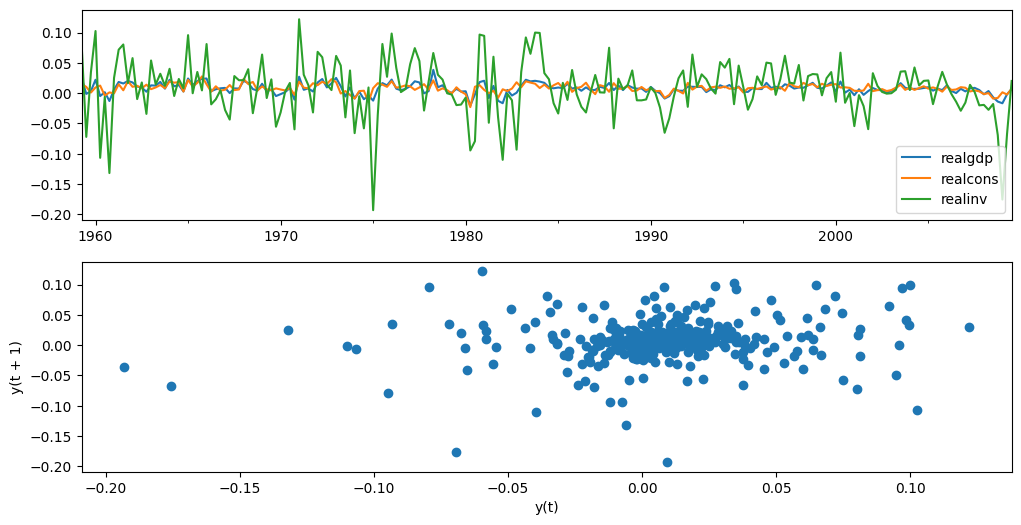

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
data.plot(ax=ax1)
pd.plotting.lag_plot(data)
plt.show()

In [9]:
data.head(2)

,realgdp,realcons,realinv
1959-06-30,0.024942,0.015286,0.080213
1959-09-30,-0.001193,0.010386,-0.072131


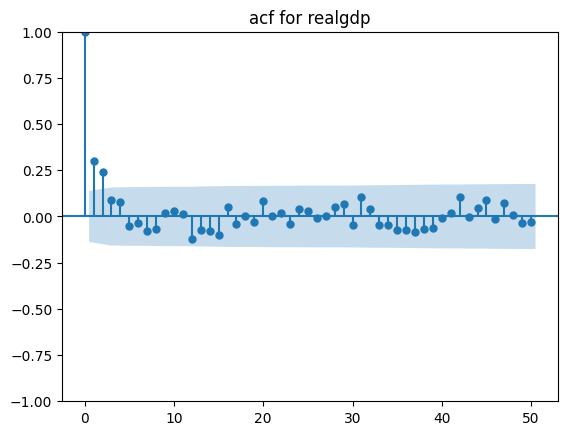

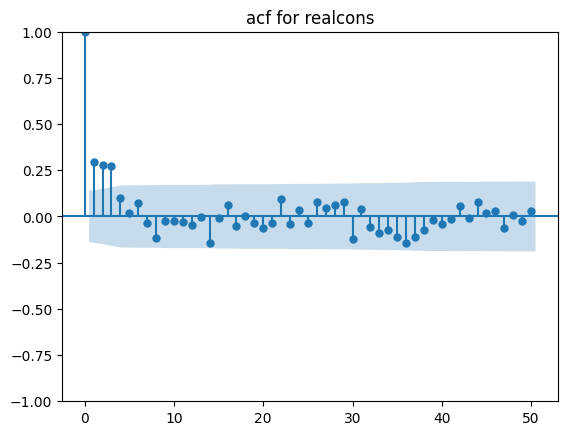

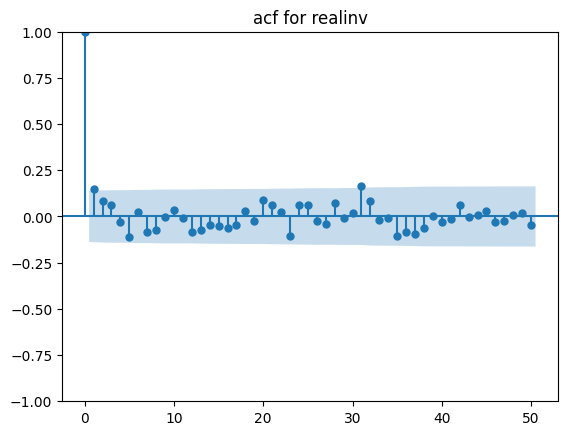

In [10]:
from statsmodels.graphics.tsaplots import plot_acf
for i in data:
    plot_acf(data[i], lags=50)
    plt.title(f"acf for {i}")
    plt.show()

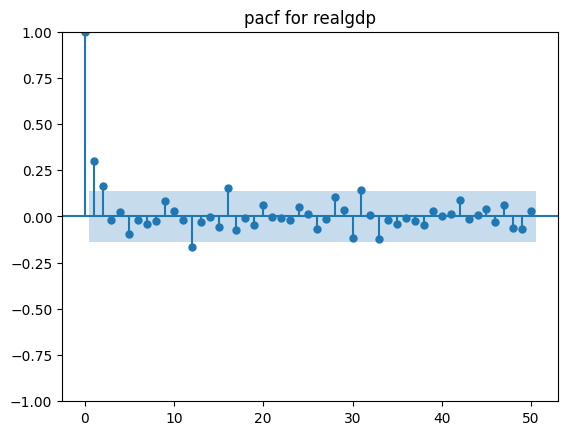

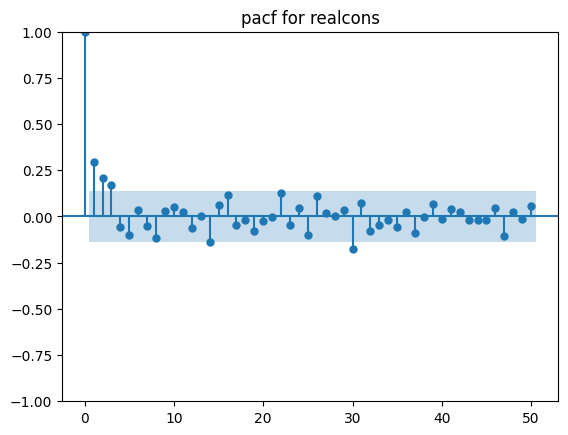

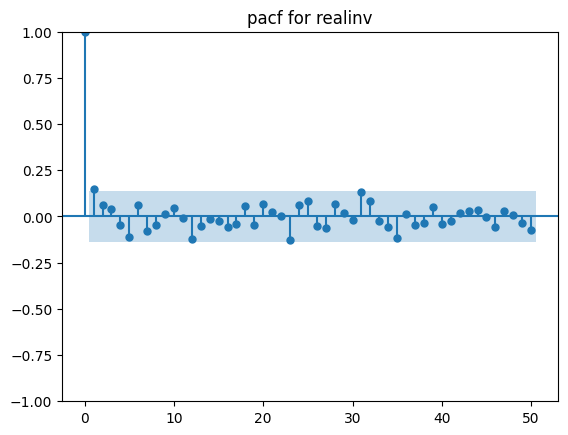

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf
for i in data:
    plot_pacf(data[i], lags=50)
    plt.title(f"pacf for {i}")
    plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller
def adf(time_series):
    result = adfuller(time_series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

for i in data:
    print(f'-Test statistic for {i}')
    adf(data[i])

-Test statistic for realgdp
ADF Statistic: -6.972871
p-value: 0.000000
-Test statistic for realcons
ADF Statistic: -4.991971
p-value: 0.000023
-Test statistic for realinv
ADF Statistic: -12.218963
p-value: 0.000000


In [13]:
obs = 5
X_train, X_test = data[0:-obs], data[-obs:]

print(X_train.shape)
print(X_test.shape)

(197, 3)
(5, 3)


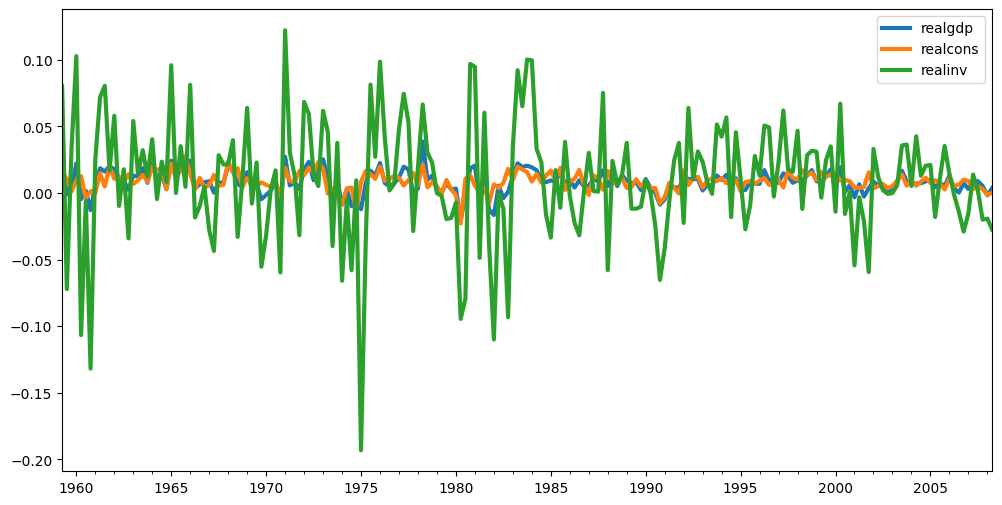

In [14]:
X_train.plot(figsize=(12,6), linewidth=3)
plt.show()

In [15]:
model_var = VAR(endog=X_train)
res = model_var.select_order(maxlags=6)
res.summary()

c:\git_files\AI_TimeSeries\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,-27.82,-27.77,8.281e-13,-27.80
1,-28.10*,-27.89*,6.277e-13*,-28.01*
2,-28.07,-27.71,6.449e-13,-27.93
3,-28.07,-27.55,6.476e-13,-27.86
4,-28.07,-27.41,6.439e-13,-27.80
5,-28.05,-27.24,6.554e-13,-27.72
6,-28.01,-27.04,6.826e-13,-27.62


In [16]:
model_fit = model_var.fit(maxlags=3, ic='aic')
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 20, Nov, 2025
Time:                     17:14:40
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.8137
Nobs:                     196.000    HQIC:                  -27.9331
Log likelihood:           1923.07    FPE:                6.81589e-13
AIC:                     -28.0144    Det(Omega_mle):     6.41506e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.004187         0.000937            4.470           0.000
L1.realgdp         -0.357764         0.174314           -2.052           0.040
L1.realcons         0.711044         0.133371            5.331    

In [17]:
lag_order = model_fit.k_ar
print(lag_order)

1


In [18]:
model_fit.forecast(X_train.values[-lag_order:], steps=5)

array([[ 0.00140148,  0.00531336, -0.02966532],
       [ 0.00573479,  0.00691368, -0.00123542],
       [ 0.00697939,  0.00794494,  0.00403378],
       [ 0.0075745 ,  0.0082942 ,  0.00725638],
       [ 0.00779776,  0.0084469 ,  0.00835919]])

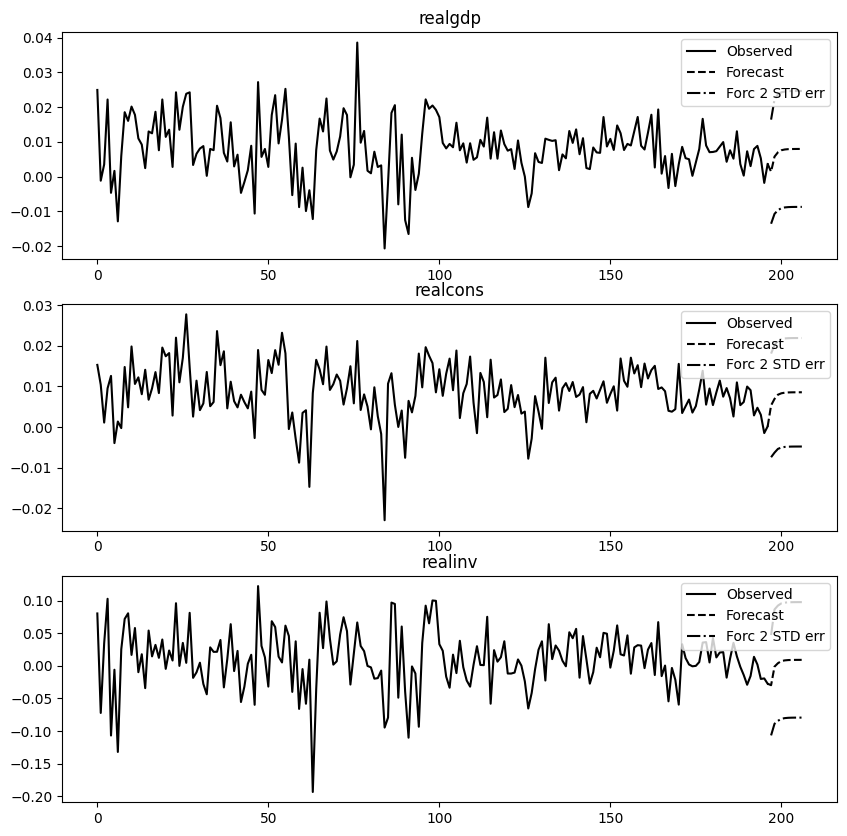

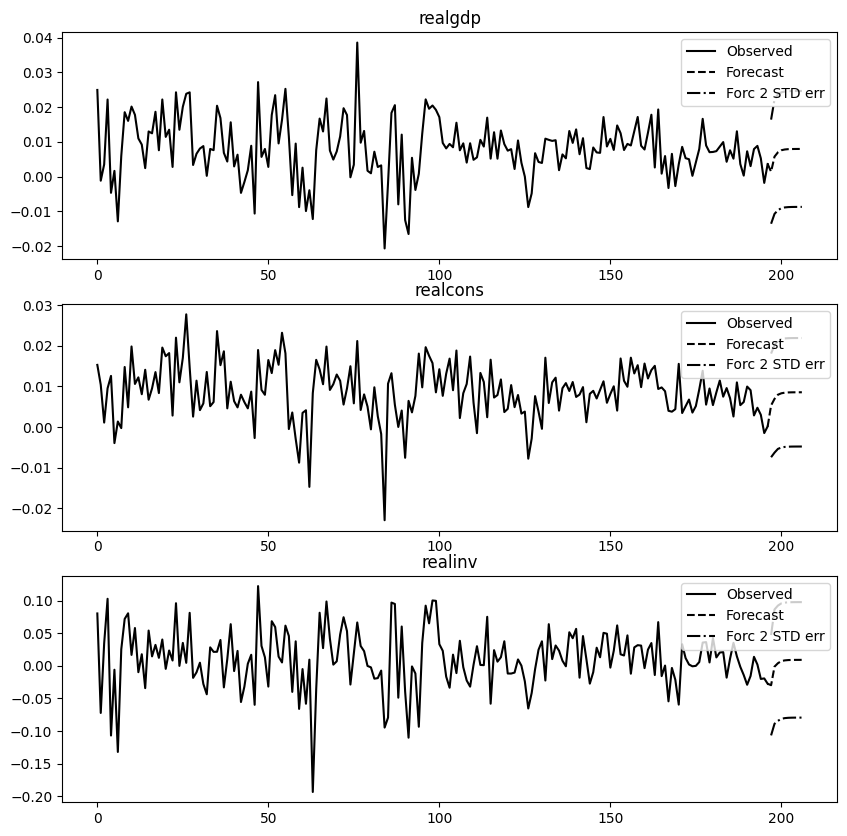

In [19]:
model_fit.plot_forecast(10)

In [20]:
pred = model_fit.forecast(X_train.values[-lag_order:], steps=obs)
pred = pd.DataFrame(pred, index=X_test.index, columns=X_test.columns + '_pred')
pred

,realgdp_pred,realcons_pred,realinv_pred
2008-09-30,0.001401,0.005313,-0.029665
2008-12-31,0.005735,0.006914,-0.001235
2009-03-31,0.006979,0.007945,0.004034
2009-06-30,0.007575,0.008294,0.007256
2009-09-30,0.007798,0.008447,0.008359


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
# Evaluate forecast bias
forecast_errors = [X_test['realgdp'][i] - pred['realgdp_pred'][i] for i in range(len(X_test['realgdp']))]
bias = sum(forecast_errors) * 1.0/ len(X_test['realgdp'])
print(f'Bias: {bias:.6f}')

# Evaluate mean absolute error
mae = mean_absolute_error(X_test['realgdp'], pred['realgdp_pred'])
print(f"MAE: {mae:.6f}")

# Evaluate mean squared error and root mean squared error
mse = mean_squared_error(X_test['realgdp'], pred['realgdp_pred'])
print(f"MSE: {mse:.6f}")
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.6f}")

Bias: -0.012335
MAE: 0.012335
MSE: 0.000219
RMSE: 0.014799


C:\Users\User\AppData\Local\Temp\ipykernel_23992\3090832215.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_errors = [X_test['realgdp'][i] - pred['realgdp_pred'][i] for i in range(len(X_test['realgdp']))]
